CATATAN PENGOLAHAN ML UNTUK PREDIKSI SAHAM BANK BCA

In [1]:
# Seperti biasa

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Memberitahu Python untuk mencari kode di folder 'src'

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Sekarang import file2 yang ada di folder 'src'

from ambil_data import unduh_data_lengkap
from fitur_teknis import tambah_fitur
from model_prediksi import latih_model_sederhana

# kita cek apakah framework atau file-file yang ada di folder 'src' berhasil dimuat

print("Framework berhasil dimuat")

Framework berhasil dimuat


In [2]:
ticker = 'BBCA.JK'     # Kode saham BCA
mulai = '2015-01-01'   
akhir = '2025-12-30'   

print(f"Sedang mengambil data {ticker} dari {mulai} sampai {akhir}...")

# Gunakan fungsi unduh_data_lengkap dari file ambil_data yang sudah kita ambil tadi dari folder src di cell 1

df = unduh_data_lengkap(ticker, mulai, akhir)

# Cek hasil

if df is not None:
    print(f"Berhasil! Terkumpul: {len(df)} hari perdagangan.")
    print("5 Data Terlama:")
    print(df.head()) # Menampilkan data tahun 2015
    print("\n5 Data Terbaru:")
    print(df.tail()) # Menampilkan data tahun 2025
else:
    print("Gagal mengambil data.")

Sedang mengambil data BBCA.JK dari 2015-01-01 sampai 2025-12-30...
Berhasil! Terkumpul: 2709 hari perdagangan.
5 Data Terlama:
Price         Adj Close   Close    High     Low    Open    Volume
Date                                                             
2015-01-02  2156.951416  2645.0  2655.0  2630.0  2655.0  29302500
2015-01-05  2152.873779  2640.0  2640.0  2625.0  2630.0  25434500
2015-01-06  2136.564209  2620.0  2640.0  2600.0  2600.0  48681500
2015-01-07  2140.640625  2625.0  2640.0  2610.0  2610.0  40334000
2015-01-08  2116.177490  2595.0  2630.0  2595.0  2625.0  54457000

5 Data Terbaru:
Price       Adj Close   Close    High     Low    Open     Volume
Date                                                            
2025-12-18     8175.0  8175.0  8250.0  8025.0  8025.0   88497200
2025-12-19     8050.0  8050.0  8225.0  8050.0  8200.0  131069800
2025-12-22     8175.0  8175.0  8175.0  8025.0  8050.0   72424200
2025-12-23     8025.0  8025.0  8125.0  7975.0  8100.0   85044100
2025

In [3]:
# Oke data sudah terunduh dan terdapat data selama 2709 hari perdagangan
# dengan data terlamanya dimulai dari 2 januari 2015 sampai data terbaru 24 desember 2025
# dini hari adalah 26/12/2025 adalah tanggal saya meneliti ini
# 25-26 desember adalah cuti internasional dan cuti saham juga
# ngeri banget kesenjangannya kelihatannya. lihat di tahun 2015 harga pasarannya itu di angka 2000an sekian sementara
# di tahun 2025 ini harga pasarannya di angka 8000an yang bedanya 6000an
# mungkin hal ini diakibatkan nilai rupiah yang berbeda antara tahun 2015 di sepuluh tahun berikutnya.

In [4]:
# mengambil data ma dan volatilitas

print("Sedang menghitung indikator teknikal")

# Kita panggil fungsi tambah_fitur dari file fitur_teknis src
# Ini akan otomatis hitung MA_5, MA_20, dan Volatilitas

df_siap = tambah_fitur(df)

# Mari kita intip hasilnya
# Pastikan kolom MA_5, MA_20, dan Volatilitas sudah muncul di kanan

# Cek apakah kolomnya benar-benar ada?
print("Daftar Kolom yang tersedia:")
print(df_siap.columns.tolist())

print("\nkolom:")
print(df_siap.tail())

Sedang menghitung indikator teknikal
Daftar Kolom yang tersedia:
['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Return', 'MA_5', 'MA_20', 'Volatilitas']

kolom:
Price       Adj Close   Close    High     Low    Open     Volume    Return  \
Date                                                                         
2025-12-18     8175.0  8175.0  8250.0  8025.0  8025.0   88497200  0.018692   
2025-12-19     8050.0  8050.0  8225.0  8050.0  8200.0  131069800 -0.015291   
2025-12-22     8175.0  8175.0  8175.0  8025.0  8050.0   72424200  0.015528   
2025-12-23     8025.0  8025.0  8125.0  7975.0  8100.0   85044100 -0.018349   
2025-12-24     8025.0  8025.0  8075.0  8000.0  8025.0   71260500  0.000000   

Price         MA_5        MA_20  Volatilitas  
Date                                          
2025-12-18  8115.0  8230.442480     0.014403  
2025-12-19  8125.0  8215.700684     0.014748  
2025-12-22  8100.0  8203.483545     0.015068  
2025-12-23  8090.0  8182.524609     0.015494  


Sedang membuat grafik analisis...


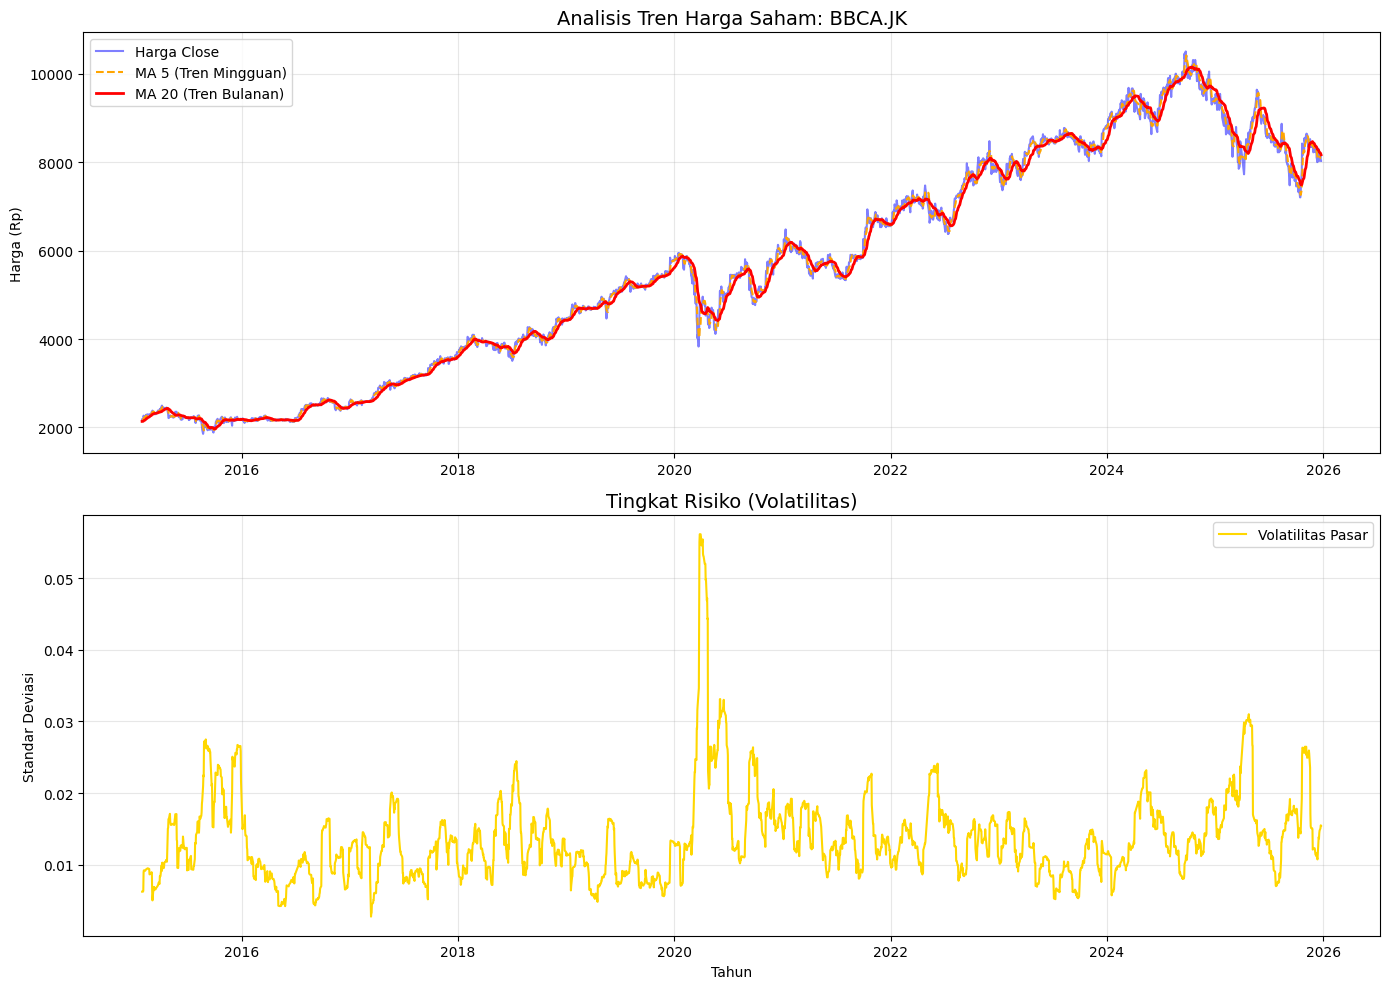

In [5]:
# Visualisasi Data guna mengecek perkembangan harga saham di Bank BCA
# Kita import fungsi plot_analisis_teknikal dari file visualisasi.py di folder src

from visualisasi import plot_analisis_teknikal

print("Sedang membuat grafik analisis...")

# Panggil fungsinya (Pastikan df_siap sudah ada dari Cell 3)

plot_analisis_teknikal(df_siap, ticker)

In [6]:
# Analisis:

# Grafik 1
# Pertumbuhan Jangka Panjang (Uptrend)
# Dari tahun 2015 di kisaran harga Rp 2.000-an, harga melunjak naik konsisten hingga menyentuh Rp 10.000-an di tahun 2024-2025.
# Insight: Ini mengonfirmasi kenapa BCA disebut saham "Blue Chip". 
# Tren jangka panjangnya naik gila-gilaan (hampir 400% dalam 10 tahun). ML akan mudah menangkap pola "naik" ini.
# But, di akhir tiba-tiba mau turun dia wadefak dan kemungkinan besar ada peluang naik jika logikanya polanya sama dengan pola tahun 2021

# Grafik 2
# Tahun 2020 harga saham di Bank BCA tidak stabil
# Dari visual  garis yang melonjak jauh ke atas, berarti harga saham saat itu random bejir
# kemungkinan dari pihak penanam atau investor kadang jual saham mahal dan kadang jual murah karena waktu itu memang crash setelah pandemi covid-19
# dan setelah itu, tahun berikutnya kembali stabil

In [7]:
import os

# Agar tidak bingung, simpan data yang sudah siap training ini ke folder data/processed
# Datanya sudah saya simpan di folder data

folder_tujuan = '../data/processed'

# Membuat folder jika belum ada (jaga-jaga)

os.makedirs(folder_tujuan, exist_ok=True)

# Menyimpan ke file CSV

path_file = os.path.join(folder_tujuan, 'bbca_siap_training.csv')
df_siap.to_csv(path_file)

print(f"Data berhasil disimpan di: {path_file}")

Data berhasil disimpan di: ../data/processed\bbca_siap_training.csv


In [8]:
# Lanjut kita bagi data training dan data test

# Batas bagi
# Kita potong per 1 Januari 2024.
# Artinya: Data sebelum 2024 buat train, Data mulai 2024 buat test.

tanggal_potong = '2024-01-01'

# pisahkan

train_data = df_siap[df_siap.index < tanggal_potong]
test_data = df_siap[df_siap.index >= tanggal_potong]

# Laporan

print(f"Pemisahan Data Selesai (Cut-off: {tanggal_potong})")

print("=" * 15)

print(f"Data Latih (Training): {len(train_data)} hari")
print(f"(Dari {train_data.index.min().date()} sampai {train_data.index.max().date()})")
print(f"-> Digunakan agar Machhine mempelajari pola masa lalu.")

print("=" * 15)

print(f"Data Uji (Testing)   : {len(test_data)} hari")
print(f"(Dari {test_data.index.min().date()} sampai {test_data.index.max().date()})")
print(f"-> Data yang digunakan untuk menggunakan model dari data training.")

print("=" * 15)

print(f"Total Data: {len(df_siap)} baris.")

Pemisahan Data Selesai (Cut-off: 2024-01-01)
Data Latih (Training): 2218 hari
(Dari 2015-01-30 sampai 2023-12-29)
-> Digunakan agar Machhine mempelajari pola masa lalu.
Data Uji (Testing)   : 471 hari
(Dari 2024-01-02 sampai 2025-12-24)
-> Data yang digunakan untuk menggunakan model dari data training.
Total Data: 2689 baris.


In [9]:
# Membuat rumus

# Import fungsi latih_model dari file model_prediksi_rumus.py

from model_prediksi_rumus import latih_model

# Kita masukkan data train dan test yang sudah dibagi di Cell 6

model_bca, X_test, y_test = latih_model(train_data, test_data)

print("\nModel ML berhasil dibuat dan disimpan di variabel 'model_bca'.")
print("Siap digunakan untuk prediksi/data test di tahap selanjutnya.")

# Cek Rumus

bias = model_bca.intercept_
w_ma5, w_ma20, w_vol = model_bca.coef_

print("="*15)
print("Rumus:")
print("="*15)
print(f"Harga Prediksi = ({w_ma5:.4f} * MA_5)")
print(f"               + ({w_ma20:.4f} * MA_20)")
print(f"               + ({w_vol:.4f} * Volatilitas)")
print(f"               + ({bias:.4f})")
print("="*15)

print("\nCara Bacanya:")
print("1. Ambil rata-rata 5 hari (MA_5), kalikan dengan angka pertama.")
print("2. Ambil rata-rata 20 hari (MA_20), kalikan dengan angka kedua.")
print("3. Cek risiko pasar (Volatilitas), kalikan dengan angka ketiga.")
print("4. Tambahkan dengan angka konstanta (Bias).")
print("5. Angka prediksi keluar.")

Machine sedang belajar mencari pola dari tahun 2015-2023...
Proses belajar selesai!
-> Koefisien MA_5       : 1.1419
-> Koefisien MA_20      : -0.1420
-> Koefisien Volatilitas: 497.4203

Model ML berhasil dibuat dan disimpan di variabel 'model_bca'.
Siap digunakan untuk prediksi/data test di tahap selanjutnya.
Rumus:
Harga Prediksi = (1.1419 * MA_5)
               + (-0.1420 * MA_20)
               + (497.4203 * Volatilitas)
               + (-3.4044)

Cara Bacanya:
1. Ambil rata-rata 5 hari (MA_5), kalikan dengan angka pertama.
2. Ambil rata-rata 20 hari (MA_20), kalikan dengan angka kedua.
3. Cek risiko pasar (Volatilitas), kalikan dengan angka ketiga.
4. Tambahkan dengan angka konstanta (Bias).
5. Angka prediksi keluar.


In [10]:
model_bca

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


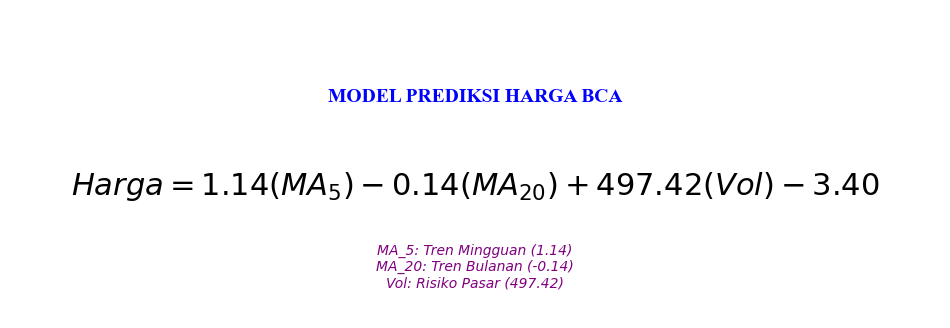

In [11]:
# Gunakan ini untuk visualisasi model biar hapal kalau mau catat-catat di buku mwheheheheh

import matplotlib.pyplot as plt

def gambar_rumus_keren(model):
    b = model.intercept_
    w1, w2, w3 = model.coef_

    # Siapkan rumus dalam format LaTex
    # Kita bulatkan 2 angka desimal biar tidak kepanjangan 2f
    
    rumus_math = (
        f"$Harga = {w1:.2f}(MA_5) {w2:+.2f}(MA_{{20}}) "
        f"{w3:+.2f}(Vol) {b:+.2f}$"
    )

    # 3. Bikin kanvas
    
    plt.figure(figsize=(12, 4), facecolor='white') # Background Putih
    ax = plt.gca()
    ax.set_facecolor("white")

    # Hilangkan sumbu X dan Y (karena bukan grafik)
    
    ax.axis('off')

    # Tulis rumus
    # Judul
    
    plt.text(0.5, 0.7, "MODEL PREDIKSI HARGA BCA", 
             fontsize=14, color='blue', ha='center', fontname='Times New Roman', weight='bold')
    
    # Rumus Utama
    
    plt.text(0.5, 0.4, rumus_math, 
             fontsize=22, color='black', ha='center', weight='bold')

    # Keterangan
    
    keterangan = (
        f"MA_5: Tren Mingguan ({w1:.2f})\n"
        f"MA_20: Tren Bulanan ({w2:.2f})\n"
        f"Vol: Risiko Pasar ({w3:.2f})"
    )
    plt.text(0.5, 0.1, keterangan, 
             fontsize=10, color='purple', ha='center', style='italic')

    plt.show()

# Panggil fungsinya

gambar_rumus_keren(model_bca)

In [12]:
# Evaluasi Performa Model

# Import fungsi evaluasi_performa dari file evaluasi_model.py di folder src

from evaluasi_model import evaluasi_performa

print("Sedang menghubungkan...")

# Jalankan evaluasi

y_pred_bca, mae, rmse, mape = evaluasi_performa(model_bca, X_test, y_test)

print("Hasil Prediksi:")
print("=" * 15)
print(f"1. Rata-rata Meleset (MAE) : Rp {mae:.2f}")
print(f"2. Error Standar (RMSE)    : Rp {rmse:.2f}")
print(f"3. Persentase Error (MAPE) : {mape:.2f}%")
print("=" * 15)

# Penjelasan Singkat

if mape < 2:
    print("Kesimpulan: Model SANGAT AKURAT (Error di bawah 2%)")
elif mape < 5:
    print("Kesimpulan: Model CUKUP BAGUS (Error di bawah 5%)")
else:
    print("Kesimpulan: Model Kurang Akurat (Perlu diperbaiki)")

Sedang menghubungkan...
Hasil Prediksi:
1. Rata-rata Meleset (MAE) : Rp 99.65
2. Error Standar (RMSE)    : Rp 131.40
3. Persentase Error (MAPE) : 1.12%
Kesimpulan: Model SANGAT AKURAT (Error di bawah 2%)


In [13]:
# Insight

# Karakteristik Fundamental Saham Blue Chip
# BBCA dikategorikan sebagai saham Blue Chip dengan kapitalisasi pasar besar dan likuiditas tinggi. 
# Pergerakan harganya cenderung mengikuti fundamental pasar dan minim dari anomali atau manipulasi spekulatif (saham gorengan). 
# Stabilitas tren ini memungkinkan model statistik linear (Linear Regression) untuk mengidentifikasi-
# korelasi pola harga dengan tingkat presisi yang tinggi.

# Efektivitas Model Parsimonial 
# Dalam analisis kuantitatif, kompleksitas algoritma (seperti Deep Learning)-
# tidak selalu menjamin hasil yang lebih baik (Occam's Razor). 
# Terbukti, pendekatan regresi linear yang mengutamakan indikator teknikal jangka pendek (Moving Average 5-Hari) 
# memiliki Explanatory Power yang kuat, mampu merepresentasikan variabilitas pergerakan harga BBCA secara efektif tanpa overfitting.

# Validitas Model untuk Pengambilan Keputusan
# Dengan tingkat akurasi mencapai 98,8% (MAPE < 2%), 
# model ini memenuhi standar statistik untuk digunakan sebagai alat bantu analisis (Decision Support System). 
# Meskipun terdapat deviasi minor pada prediksi nominal harga (spot price), 
# model ini memiliki reliabilitas tinggi dalam memproyeksikan arah momentum dan tren pasar (Directional Accuracy), 
# sehingga valid digunakan sebagai indikator konfirmasi tren.

# Parafrase Insight: Gemini 3 (Pro) by Prompt "Bahasa Saham dalam Data Science"

In [14]:
# Lek gabut cek tabelnya dulu rek

import pandas as pd

df_hasil = pd.DataFrame(index=y_test.index)
df_hasil['Harga Asli'] = y_test.values
df_hasil['Harga Prediksi'] = y_pred_bca

df_hasil['Selisih (Rp)'] = df_hasil['Harga Asli'] - df_hasil['Harga Prediksi']

# 3. Tampilkan 10 Data Pertama (Awal Tahun 2024)

print("\n10 Data Awalan (Januari 2024):")
print("-" * 50)
print(df_hasil.head(10))

# 4. Tampilkan 10 Data Terakhir (Akhir Data 2025)

print("\n10 Data Terakhir (Desember 2025):")
print("-" * 60)
print(df_hasil.tail(10))


10 Data Awalan (Januari 2024):
--------------------------------------------------
             Harga Asli  Harga Prediksi  Selisih (Rp)
Date                                                 
2024-01-02  8834.937500     8840.420043     -5.482543
2024-01-03  8764.632812     8842.921157    -78.288344
2024-01-04  8881.808594     8860.794573     21.014021
2024-01-05  8975.545898     8893.781626     81.764272
2024-01-08  8975.545898     8925.845553     49.700345
2024-01-09  9022.416992     8963.337555     59.079437
2024-01-10  8952.112305     9000.810844    -48.698539
2024-01-11  8975.545898     9016.709165    -41.163267
2024-01-12  9092.721680     9036.755182     55.966498
2024-01-15  9116.155273     9061.805959     54.349315

10 Data Terakhir (Desember 2025):
------------------------------------------------------------
            Harga Asli  Harga Prediksi  Selisih (Rp)
Date                                                
2025-12-11      8000.0     8135.544752   -135.544752
2025-12-12    

In [15]:
# Pada tahap awal pengujian (Januari 2024), 
# model mendemonstrasikan tingkat presisi yang superior dengan residu deviasi yang sangat rendah dan stabil, 
# yang mencerminkan kemampuan algoritma dalam mereplikasi pergerakan harga pada kondisi pasar normal; namun, 
# memasuki periode akhir data uji (Desember 2025), 
# teridentifikasi adanya divergensi performa di mana model cenderung mengalami 
# bias overestimation (nilai prediksi konsisten lebih tinggi dari harga aktual), 
# serta menunjukkan keterlambatan respons (lag) yang signifikan terhadap lonjakan harga mendadak—seperti 
# yang terjadi pada anomali 15 Desember 2025—yang secara teknis mengonfirmasi keterbatasan inheren dari 
# penggunaan indikator Moving Average sebagai basis prediktor dalam mengantisipasi volatilitas jangka pendek yang ekstrem.

In [16]:
# Mana tau butuh ntar heheehehhehhehe

import os
import pandas as pd

df_laporan_lengkap = pd.DataFrame(index=y_test.index)
df_laporan_lengkap['Harga Asli'] = y_test.values
df_laporan_lengkap['Harga Prediksi'] = y_pred_bca

df_laporan_lengkap['Selisih (Rp)'] = df_laporan_lengkap['Harga Asli'] - df_laporan_lengkap['Harga Prediksi']
df_laporan_lengkap['Error (%)'] = (abs(df_laporan_lengkap['Selisih (Rp)']) / df_laporan_lengkap['Harga Asli']) * 100

folder_simpan = '../data/result'
nama_file = 'bbca_prediksi_dan_realita.csv'
path_lengkap = os.path.join(folder_simpan, nama_file)

os.makedirs(folder_simpan, exist_ok=True)

df_laporan_lengkap.to_csv(path_lengkap)

print(f"Sukses! Laporan lengkap berhasil disimpan.")
print(f"Lokasi: {path_lengkap}")

Sukses! Laporan lengkap berhasil disimpan.
Lokasi: ../data/result\bbca_prediksi_dan_realita.csv


Visualisasi berhasil dibuat.


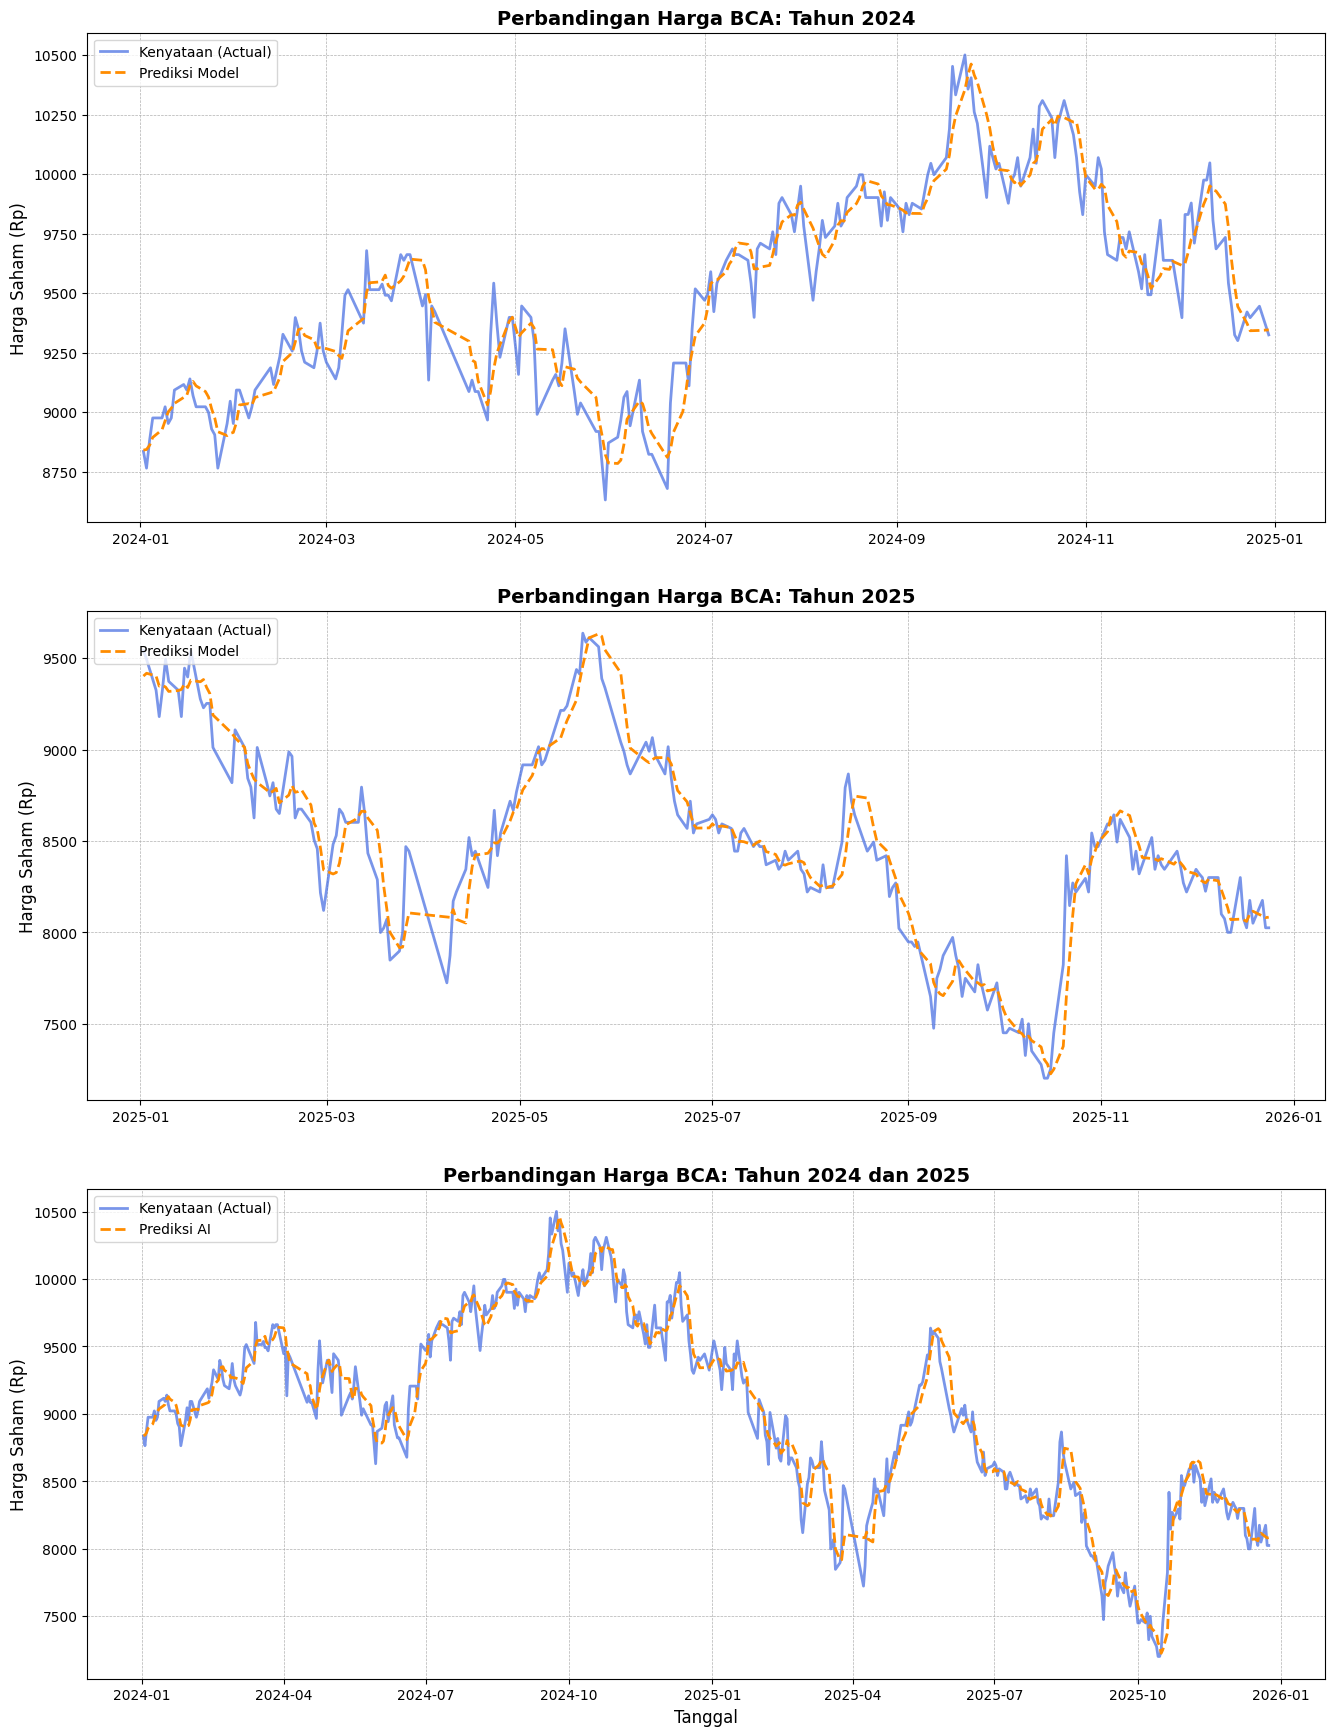

In [17]:
# Visualisasi Hasil Prediksi Model dengan Kenyataan di Pasar Saham BCA

import matplotlib.pyplot as plt
import pandas as pd

df_visual = pd.DataFrame(index=y_test.index)
df_visual['Harga Asli'] = y_test.values
df_visual['Harga Prediksi'] = y_pred_bca

df_visual.index = pd.to_datetime(df_visual.index)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 18))

warna_asli = 'royalblue'
warna_prediksi = 'darkorange'
gaya_prediksi = '--' 

# Grafik 1: Tahun 2024

data_2024 = df_visual.loc['2024'] 
ax1.plot(data_2024.index, data_2024['Harga Asli'], label='Kenyataan (Actual)', color=warna_asli, linewidth=2, alpha=0.7)
ax1.plot(data_2024.index, data_2024['Harga Prediksi'], label='Prediksi Model', color=warna_prediksi, linestyle=gaya_prediksi, linewidth=2)

ax1.set_title('Perbandingan Harga BCA: Tahun 2024', fontsize=14, fontweight='bold')
ax1.set_ylabel('Harga Saham (Rp)', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Grafik 2: Tahun 2025

data_2025 = df_visual.loc['2025']
ax2.plot(data_2025.index, data_2025['Harga Asli'], label='Kenyataan (Actual)', color=warna_asli, linewidth=2, alpha=0.7)
ax2.plot(data_2025.index, data_2025['Harga Prediksi'], label='Prediksi Model', color=warna_prediksi, linestyle=gaya_prediksi, linewidth=2)

ax2.set_title('Perbandingan Harga BCA: Tahun 2025', fontsize=14, fontweight='bold')
ax2.set_ylabel('Harga Saham (Rp)', fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Grafik 3: Tahun 2024 dan 2025

ax3.plot(df_visual.index, df_visual['Harga Asli'], label='Kenyataan (Actual)', color=warna_asli, linewidth=2, alpha=0.7)
ax3.plot(df_visual.index, df_visual['Harga Prediksi'], label='Prediksi AI', color=warna_prediksi, linestyle=gaya_prediksi, linewidth=2)

ax3.set_title('Perbandingan Harga BCA: Tahun 2024 dan 2025', fontsize=14, fontweight='bold')
ax3.set_xlabel('Tanggal', fontsize=12)
ax3.set_ylabel('Harga Saham (Rp)', fontsize=12)
ax3.legend(loc='upper left')
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout(pad=3.0)
print("Visualisasi berhasil dibuat.")
plt.show()

In [18]:
# Insight

# Visualisasi komparatif antara harga aktual dan prediksi model mengonfirmasi validitas algoritma regresi linear dalam 
# memetakan lintasan harga BBCA dengan directional accuracy yang tinggi sepanjang periode 2024 hingga 2025, 
# di mana garis prediksi secara konsisten mereplikasi pola tren utama yang dibentuk oleh harga pasar; meskipun demikian, 
# observasi mendalam pada volatilitas tahun 2025 menyoroti adanya divergensi temporal (lag) pada titik-titik pembalikan arah yang ekstrem, 
# yang secara empiris memvalidasi batasan natural dari variabel Moving Average sebagai 
# indikator pengikut tren (trend-following) yang cenderung memuluskan fluktuasi jangka pendek 
# namun tetap reliabel dalam memproyeksikan momentum jangka menengah hingga panjang.

In [19]:
# Simpan model

import joblib
import os

folder_tujuan = '../models'  

nama_file = 'model_prediksi_saham_BCA_linear.pkl' 
path_lengkap = os.path.join(folder_tujuan, nama_file)

os.makedirs(folder_tujuan, exist_ok=True)

joblib.dump(model_bca, path_lengkap)

print("Model berhasil disimpan.")
print("=" * 20)
print(f"Lokasi File : {path_lengkap}")
print("Status: Siap digunakan (Deploy Ready)")

Model berhasil disimpan.
Lokasi File : ../models\model_prediksi_saham_BCA_linear.pkl
Status: Siap digunakan (Deploy Ready)


In [20]:
import pandas as pd

input_valid_terakhir = X_test.iloc[[-1]]

# Lakukan prediksi satu kali

prediksi_fix = model_bca.predict(input_valid_terakhir)[0]

print("Prediksi Stabil")
print(f"Menggunakan data input tanggal: {input_valid_terakhir.index[0].date()}")
print("-" * 45)
print(f"{'TANGGAL':<15} {'PREDIKSI (Rp)':<20}")
print("-" * 45)

dates_to_predict = pd.date_range(start='2025-12-25', end='2025-12-28')

for date in dates_to_predict:
    print(f"{date.strftime('%Y-%m-%d'):<15} {prediksi_fix:,.2f}")

print("-" * 45)
print("Catatan: Harga diprediksi datar karena Bursa Tutup (Libur Natal).")

Prediksi Stabil
Menggunakan data input tanggal: 2025-12-24
---------------------------------------------
TANGGAL         PREDIKSI (Rp)       
---------------------------------------------
2025-12-25      8,083.11
2025-12-26      8,083.11
2025-12-27      8,083.11
2025-12-28      8,083.11
---------------------------------------------
Catatan: Harga diprediksi datar karena Bursa Tutup (Libur Natal).


In [22]:
from IPython.display import HTML, display

html_code = """
<div style="
    background: linear-gradient(-45deg, #ee7752, #e73c7e, #23a6d5, #23d5ab);
    background-size: 400% 400%;
    animation: gradient 15s ease infinite;
    height: 200px;
    display: flex;
    align-items: center;
    justify-content: center;
    border-radius: 15px;
    font-family: Arial, sans-serif;
">
    <h1 style="
        color: white;
        font-size: 60px;
        text-shadow: 2px 2px 4px #000000;
        animation: pulse 2s infinite;
    ">
        ✨ TERIMA KASIH! ✨
    </h1>
</div>

<style>
@keyframes gradient {
    0% {background-position: 0% 50%;}
    50% {background-position: 100% 50%;}
    100% {background-position: 0% 50%;}
}
@keyframes pulse {
    0% { transform: scale(1); }
    50% { transform: scale(1.1); }
    100% { transform: scale(1); }
}
</style>
"""

display(HTML(html_code))

In [25]:
from IPython.display import HTML, display

html_code = """
<canvas id="matrixCanvas" style="width: 100%; height: 300px; border-radius: 10px;"></canvas>
<div style="position: relative; top: -200px; text-align: center;">
    <h1 style="color: #0F0; font-family: monospace; font-size: 50px; background: rgba(0,0,0,0.7); display: inline-block; padding: 10px 20px; border: 2px solid #0F0; box-shadow: 0 0 20px #0F0;">
        SORRY YA ANEH-ANEH AJA BEJIR. <br> GUA MEMANG JAGO DESAIN MAH KALAU HTML DAN CSS
    </h1>
</div>

<script>
    var c = document.getElementById("matrixCanvas");
    var ctx = c.getContext("2d");

    c.height = 300;
    c.width = window.innerWidth - 50;

    var matrix = "ABCDEFGHIJKLMNOPQRSTUVWXYZ123456789@#$%^&*()*&^%";
    matrix = matrix.split("");

    var font_size = 14;
    var columns = c.width/font_size; 
    var drops = [];

    for(var x = 0; x < columns; x++)
        drops[x] = 1; 

    function draw() {
        ctx.fillStyle = "rgba(0, 0, 0, 0.05)";
        ctx.fillRect(0, 0, c.width, c.height);

        ctx.fillStyle = "#0F0"; 
        ctx.font = font_size + "px arial";
        
        for(var i = 0; i < drops.length; i++) {
            var text = matrix[Math.floor(Math.random()*matrix.length)];
            ctx.fillText(text, i*font_size, drops[i]*font_size);

            if(drops[i]*font_size > c.height && Math.random() > 0.975)
                drops[i] = 0;

            drops[i]++;
        }
    }
    setInterval(draw, 33);
</script>
"""

display(HTML(html_code))

In [31]:
from IPython.display import HTML, display

html_code = """
<div style="
    background: radial-gradient(circle at center, #1b2735 0%, #090a0f 100%);
    width: 100%;
    height: 350px;
    border-radius: 15px;
    position: relative;
    overflow: hidden;
    display: flex;
    flex-direction: column;
    align-items: center;
    justify-content: center;
    font-family: 'Courier New', monospace;
">
    
    <div class="stars"></div>
    <div class="stars2"></div>

    <style>
        .stars, .stars2 { position: absolute; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; }
        .stars { background: transparent box-shadow(white 2px 2px 2px); animation: animStar 50s linear infinite; }
        
        .text-santai {
            color: #a5d6ff;
            font-size: 20px;
            opacity: 0;
            animation: fadeIn 2s ease-in forwards;
            animation-delay: 0.5s; 
            text-align: center;
        }

        .text-ngegas {
            color: #ff4444;
            font-size: 40px;
            font-weight: 900;
            text-transform: uppercase;
            opacity: 0;
            transform: scale(0.5);
            text-shadow: 0 0 20px red;
            /* Gabungan animasi: Muncul besar (pop) dan getar (shake) */
            animation: popIn 0.5s cubic-bezier(0.175, 0.885, 0.32, 1.275) forwards, shake 0.5s ease-in-out infinite;
            animation-delay: 3s; /* Muncul setelah teks pertama selesai */
            margin-top: 20px;
            text-align: center;
            border: 3px solid #ff4444;
            padding: 10px 20px;
            background: rgba(0,0,0,0.5);
        }

        @keyframes fadeIn { to { opacity: 1; } }
        
        @keyframes popIn { 
            to { opacity: 1; transform: scale(1); } 
        }
        
        @keyframes shake {
            0% { transform: translate(1px, 1px) rotate(0deg); }
            10% { transform: translate(-1px, -2px) rotate(-1deg); }
            20% { transform: translate(-3px, 0px) rotate(1deg); }
            30% { transform: translate(3px, 2px) rotate(0deg); }
            40% { transform: translate(1px, -1px) rotate(1deg); }
            50% { transform: translate(-1px, 2px) rotate(-1deg); }
            60% { transform: translate(-3px, 1px) rotate(0deg); }
            70% { transform: translate(3px, 1px) rotate(-1deg); }
            80% { transform: translate(-1px, -1px) rotate(1deg); }
            90% { transform: translate(1px, 2px) rotate(0deg); }
            100% { transform: translate(1px, -2px) rotate(-1deg); }
        }
    </style>

    <div class="text-santai">
        Makasih ya sudah lihat sampai sini...
    </div>

    <div class="text-ngegas">
        TOR MONITOR?<br>KETUAAAA!!!!
    </div>

</div>
"""

display(HTML(html_code))